# Exercise 3: Classification

## Objective
Predict human activity from sensor features using Logistic Regression. Learn how to train a classifier, evaluate its performance, visualize confusion matrices, and test model robustness.

## Step 1: Import Libraries
We import the necessary Python libraries for preprocessing, training, evaluation, and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

## Step 2: Load Data
Load training and test features and labels, and map activity IDs to readable names.

In [5]:
# Load activity labels
activity_labels = pd.read_csv('dataset/activity_labels.txt', delim_whitespace=True, header=None, index_col=0)

# Load training and test features
X_train = pd.read_csv('dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_test = pd.read_csv('dataset/test/X_test.txt', delim_whitespace=True, header=None)

# Load training and test labels
y_train = pd.read_csv('dataset/train/y_train.txt', header=None)
y_test = pd.read_csv('dataset/test/y_test.txt', header=None)

# Map activity IDs to names
y_train_mapped = y_train[0].map(activity_labels[1])
y_test_mapped = y_test[0].map(activity_labels[1])

print("Data loaded. Classes:", activity_labels[1].unique())

C:\Users\mekyy\AppData\Local\Temp\ipykernel_35216\1864042114.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  activity_labels = pd.read_csv('dataset/activity_labels.txt', delim_whitespace=True, header=None, index_col=0)
C:\Users\mekyy\AppData\Local\Temp\ipykernel_35216\1864042114.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('dataset/train/X_train.txt', delim_whitespace=True, header=None)
C:\Users\mekyy\AppData\Local\Temp\ipykernel_35216\1864042114.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('dataset/test/X_test.txt', delim_whitespace=True, header=None)


Data loaded. Classes: ['WALKING' 'WALKING_UPSTAIRS' 'WALKING_DOWNSTAIRS' 'SITTING' 'STANDING'
 'LAYING']


## Step 3: Normalize Features
Scale all features using StandardScaler. This helps the Logistic Regression model converge faster and perform better.

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 4: Train Logistic Regression Model
We train a multi-class Logistic Regression classifier. We use `.ravel()` on the target to avoid a DataConversionWarning.

In [10]:
clf_model = LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

# Note: y_train_mapped is a Series, but sklearn prefers a 1D array. 
clf_model.fit(X_train_scaled, y_train_mapped)

S:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

## Step 5: Make Predictions and Evaluate
Predict activity on the test set and compute overall accuracy.

In [12]:
y_pred = clf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test_mapped, y_pred)
print(f'Accuracy on test set: {accuracy:.4f}')

Accuracy on test set: 0.9549


## Step 6: Confusion Matrix
Visualize which activities are most often confused by the classifier.

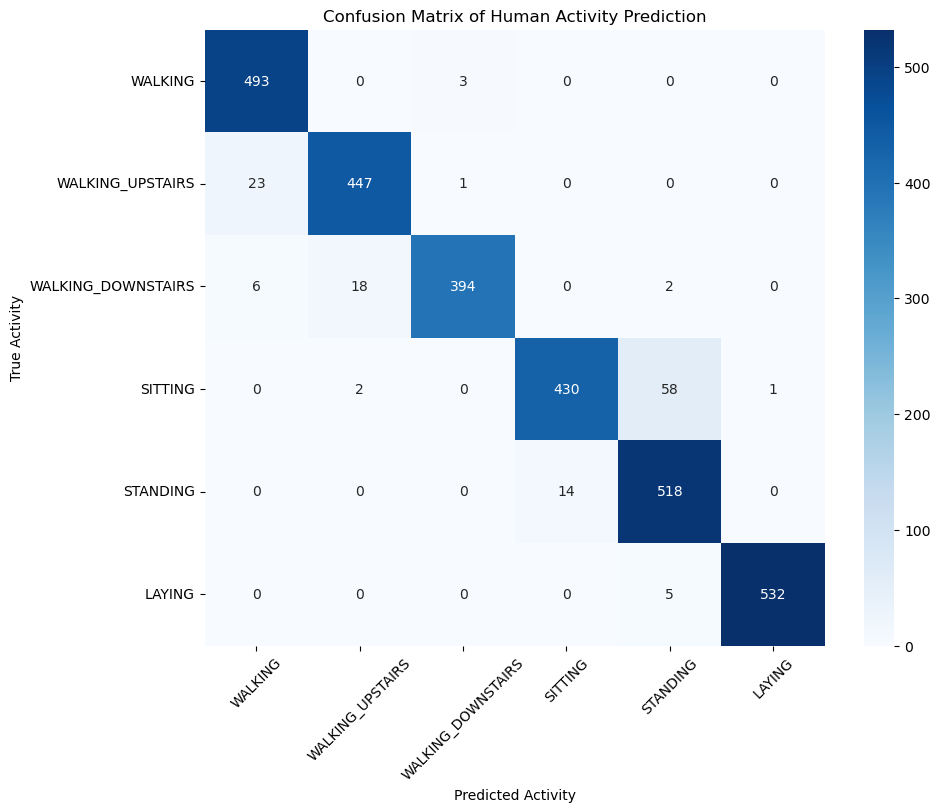

In [15]:
labels = activity_labels[1].tolist()
cm = confusion_matrix(y_test_mapped, y_pred, labels=labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted Activity')
plt.ylabel('True Activity')
plt.title('Confusion Matrix of Human Activity Prediction')
plt.xticks(rotation=45)
plt.show()

## Step 7: Test Robustness with Noise
Add small random noise to features to check if the model is stable.

In [18]:
# Add noise to the standardized test set
noise_factor = 0.1
X_test_noisy = X_test_scaled + np.random.normal(0, noise_factor, X_test_scaled.shape)

y_pred_noisy = clf_model.predict(X_test_noisy)
accuracy_noisy = accuracy_score(y_test_mapped, y_pred_noisy)

print(f'Accuracy with noise (factor={noise_factor}): {accuracy_noisy:.4f}')
print(f'Drop in accuracy: {(accuracy - accuracy_noisy):.4f}')

Accuracy with noise (factor=0.1): 0.9515
Drop in accuracy: 0.0034


## Step 8: Reflection Questions
1. Which activities are most often confused? (Hint: Look at SITTING vs STANDING in the matrix)
2. How does scaling affect the classifier?
3. How can you improve model robustness and accuracy?